In [1]:
import sqlite3
import pandas as pd

# เชื่อมต่อฐานข้อมูล
conn = sqlite3.connect("property_full_data_clickable.db")

# อ่านข้อมูลจากตาราง properties
df = pd.read_sql_query("SELECT * FROM properties", conn)

# แสดงตัวอย่างข้อมูล
df.head()


,id,property_code,title,price,description,bedrooms,bathrooms,floor,area,facilities,image_filename,image_path,image_url
0,1,LC90692,ให้เช่าคอนโดหรูในทองหล่อ I THE ESSE SUKHUMVIT 36,"ราคาเช่า: ฿ 190,000 / เดือน",★ THE ESSE SUKHUMVIT 36 ★\n\nความเงียบสงบและคว...,,,,,,LC90692_01.jpg,images\LC90692\LC90692_01.jpg,https://pix.dotproperty.co.th/eyJidWNrZXQiOiJw...
1,2,LC90692,ให้เช่าคอนโดหรูในทองหล่อ I THE ESSE SUKHUMVIT 36,"ราคาเช่า: ฿ 190,000 / เดือน",★ THE ESSE SUKHUMVIT 36 ★\n\nความเงียบสงบและคว...,,,,,,LC90692_02.jpg,images\LC90692\LC90692_02.jpg,https://pix.dotproperty.co.th/eyJidWNrZXQiOiJw...
2,3,LC90692,ให้เช่าคอนโดหรูในทองหล่อ I THE ESSE SUKHUMVIT 36,"ราคาเช่า: ฿ 190,000 / เดือน",★ THE ESSE SUKHUMVIT 36 ★\n\nความเงียบสงบและคว...,,,,,,LC90692_03.jpg,images\LC90692\LC90692_03.jpg,https://pix.dotproperty.co.th/eyJidWNrZXQiOiJw...
3,4,LC90692,ให้เช่าคอนโดหรูในทองหล่อ I THE ESSE SUKHUMVIT 36,"ราคาเช่า: ฿ 190,000 / เดือน",★ THE ESSE SUKHUMVIT 36 ★\n\nความเงียบสงบและคว...,,,,,,LC90692_04.jpg,images\LC90692\LC90692_04.jpg,https://pix.dotproperty.co.th/eyJidWNrZXQiOiJw...
4,5,LC90246,ปล่อยเช่าเพนท์เฮาท์หรู แถวสุขุมวิท 36,"ราคาเช่า: ฿ 550,000 / เดือน",★ THE ESSE SUKHUMVIT 36 ★\n\nThe peaceful and ...,,,,,,LC90246_01.jpg,images\LC90246\LC90246_01.jpg,https://pix.dotproperty.co.th/eyJidWNrZXQiOiJw...


In [4]:
import os
import numpy as np
import pickle
from PIL import Image
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D

# ---------- CONFIG ----------
image_dir = "images"
image_size = (224, 224)

# ---------- Load EfficientNetB0 ----------
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
x = GlobalAveragePooling2D()(base_model.output)
model = Model(inputs=base_model.input, outputs=x)

# ---------- Load & Extract ----------
image_paths = []
feature_list = []

for root, _, files in os.walk(image_dir):
    for file in files:
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            path = os.path.join(root, file)
            try:
                img = Image.open(path).convert("RGB").resize(image_size)
                x = np.expand_dims(np.array(img), axis=0)
                x = preprocess_input(x)
                feature = model.predict(x, verbose=0)[0]
                feature_list.append(feature)
                image_paths.append(path)
            except Exception as e:
                print(f"❌ อ่านภาพไม่ได้: {path} | {e}")

# ---------- Save Features ----------
features = np.array(feature_list)
np.save("features.npy", features)

with open("image_paths.pkl", "wb") as f:
    pickle.dump(image_paths, f)

model.save("efficientnet_feature_extractor.h5")

print(f"✅ สร้างและบันทึกแล้วทั้งหมด {len(image_paths)} ภาพ")


✅ สร้างและบันทึกแล้วทั้งหมด 710 ภาพ


In [2]:
# import os
# import numpy as np
# from PIL import Image
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications.efficientnet import preprocess_input
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import GlobalAveragePooling2D
# from sklearn.neighbors import NearestNeighbors

# # ---------- CONFIG ----------
# image_dir = "images"
# image_size = (224, 224)

# # ---------- Load EfficientNetB0 (Pretrained on ImageNet) ----------
# base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
# x = GlobalAveragePooling2D()(base_model.output)
# model = Model(inputs=base_model.input, outputs=x)

# # ---------- ฟังก์ชันโหลดและแปลงภาพ ----------
# def load_and_preprocess(img_path):
#     img = Image.open(img_path).convert("RGB").resize(image_size)
#     x = np.array(img)
#     x = np.expand_dims(x, axis=0)
#     x = preprocess_input(x)
#     return x

# # ---------- Load ทุกภาพ และดึง features ----------
# image_paths = []
# feature_list = []

# for root, dirs, files in os.walk(image_dir):
#     for file in files:
#         if file.lower().endswith((".jpg", ".jpeg", ".png")):
#             path = os.path.join(root, file)
#             x = load_and_preprocess(path)
#             feature = model.predict(x, verbose=0)[0]
#             feature_list.append(feature)
#             image_paths.append(path)

# feature_array = np.array(feature_list)
# print(f"✅ สร้างฟีเจอร์เวกเตอร์แล้วทั้งหมด: {len(feature_array)} ภาพ")

# # ---------- สร้าง NearestNeighbors ----------
# nn_model = NearestNeighbors(n_neighbors=5, metric="cosine")
# nn_model.fit(feature_array)

# # ---------- ทดสอบ: ค้นหาภาพที่คล้ายกัน ----------
# query_image = image_paths[0]
# query_feature = model.predict(load_and_preprocess(query_image), verbose=0)[0]
# distances, indices = nn_model.kneighbors([query_feature])

# print(f"\n🔍 ภาพที่คล้ายกับ {query_image}")
# for i in indices[0]:
#     print(f"👉 {image_paths[i]}")



🔍 ภาพที่คล้ายกับ images\0193d401-1f57-7ee2-bc51-ecfa1f90caaa\0193d401-1f57-7ee2-bc51-ecfa1f90caaa_01.jpg
👉 images\0193d401-1f57-7ee2-bc51-ecfa1f90caaa\0193d401-1f57-7ee2-bc51-ecfa1f90caaa_01.jpg  (100.0%)
👉 images\U1160596R\U1160596R_01.jpg  (71.97000122070312%)
👉 images\U1018756R\U1018756R_02.jpg  (68.47000122070312%)
👉 images\U1180558R\U1180558R_01.jpg  (67.38999938964844%)
👉 images\086\086_02.jpg  (67.05999755859375%)


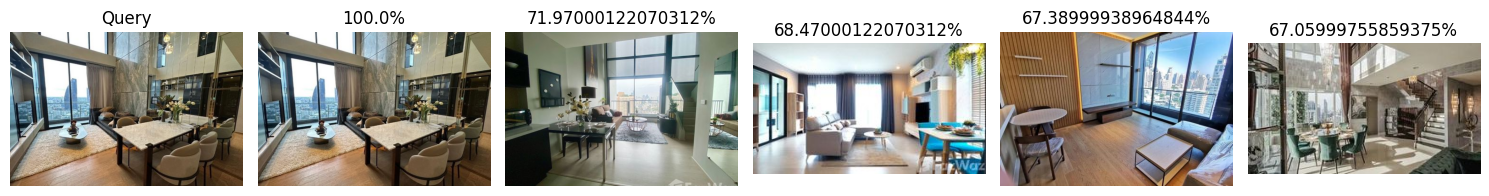

In [5]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pickle
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import GlobalAveragePooling2D

# ---------- CONFIG ----------
image_dir = "images"
image_size = (224, 224)
top_k = 5

# ---------- STEP 1: สร้าง/โหลดโมเดล ----------
def build_model():
    base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    model = Model(inputs=base_model.input, outputs=x)
    return model

# ---------- STEP 2: โหลดและแปลงภาพ ----------
def load_and_preprocess(img_path):
    img = Image.open(img_path).convert("RGB").resize(image_size)
    x = np.expand_dims(np.array(img), axis=0)
    return preprocess_input(x)

# ---------- STEP 3: ดึงฟีเจอร์และบันทึก ----------
def extract_and_save_features(model):
    image_paths = []
    feature_list = []

    for root, _, files in os.walk(image_dir):
        for file in files:
            if file.lower().endswith((".jpg", ".jpeg", ".png")):
                path = os.path.join(root, file)
                x = load_and_preprocess(path)
                feature = model.predict(x, verbose=0)[0]
                feature_list.append(feature)
                image_paths.append(path)

    features = np.array(feature_list)
    np.save("features.npy", features)

    with open("image_paths.pkl", "wb") as f:
        pickle.dump(image_paths, f)

    model.save("efficientnet_feature_extractor.h5")
    print("✅ บันทึก model, features และ paths เรียบร้อยแล้ว")
    return features, image_paths

# ---------- STEP 4: โหลดทุกอย่างกลับมา ----------
def load_saved_data():
    model = load_model("efficientnet_feature_extractor.h5")
    features = np.load("features.npy")

    with open("image_paths.pkl", "rb") as f:
        image_paths = pickle.load(f)

    return model, features, image_paths

# ---------- STEP 5: แสดงภาพคล้ายกัน ----------
def show_similar_images(query_path, model, features, image_paths, top_k=5):
    x = load_and_preprocess(query_path)
    query_feature = model.predict(x, verbose=0)[0]

    nn_model = NearestNeighbors(n_neighbors=top_k, metric="cosine")
    nn_model.fit(features)
    distances, indices = nn_model.kneighbors([query_feature])

    plt.figure(figsize=(15, 4))

    # Query Image
    plt.subplot(1, top_k + 1, 1)
    plt.imshow(Image.open(query_path))
    plt.title("Query")
    plt.axis("off")

    print(f"\n🔍 ภาพที่คล้ายกับ {query_path}")
    for i, idx in enumerate(indices[0]):
        path = image_paths[idx]
        sim = 1 - distances[0][i]
        percent = round(sim * 100, 2)

        # Show image
        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(Image.open(path))
        plt.title(f"{percent}%")
        plt.axis("off")

        # Print
        print(f"👉 {path}  ({percent}%)")

    plt.tight_layout()
    plt.show()

# ---------- MAIN FLOW ----------
# ถ้ายังไม่เคยสร้างไฟล์: ให้ run extract_and_save_features()
if not os.path.exists("efficientnet_feature_extractor.h5"):
    model = build_model()
    features, image_paths = extract_and_save_features(model)
else:
    model, features, image_paths = load_saved_data()

# ---------- ทดสอบ: ใช้ภาพแรกในฐานข้อมูล ----------
query_image = image_paths[0]
show_similar_images(query_image, model, features, image_paths, top_k=5)


In [6]:
import os
import io
import pickle
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# ---------- CONFIG ----------
image_size = (224, 224)
top_k = 5

# ---------- Load Model and Features ----------
model = load_model("efficientnet_feature_extractor.h5")
features = np.load("features.npy")
with open("image_paths.pkl", "rb") as f:
    image_paths = pickle.load(f)

# ---------- Preprocess ----------
def preprocess_image(img):
    img = img.convert("RGB").resize(image_size)
    x = np.expand_dims(np.array(img), axis=0)
    return preprocess_input(x)

# ---------- ค้นหาและแสดงผล ----------
def search_and_display_results(query_img):
    query_feature = model.predict(preprocess_image(query_img), verbose=0)[0]
    nn = NearestNeighbors(n_neighbors=top_k, metric="cosine")
    nn.fit(features)
    distances, indices = nn.kneighbors([query_feature])

    clear_output(wait=True)
    display(widgets.HTML("<h3>📷 ภาพที่คุณอัปโหลด:</h3>"))
    display(query_img)

    print("\n🔍 ภาพที่คล้ายกับภาพที่อัปโหลด:")
    plt.figure(figsize=(15, 4))
    plt.subplot(1, top_k + 1, 1)
    plt.imshow(query_img)
    plt.title("Query")
    plt.axis("off")

    for i, idx in enumerate(indices[0]):
        sim_img = Image.open(image_paths[idx])
        sim_score = 1 - distances[0][i]
        sim_percent = round(sim_score * 100, 2)

        plt.subplot(1, top_k + 1, i + 2)
        plt.imshow(sim_img)
        plt.title(f"{sim_percent}%")
        plt.axis("off")

        print(f"👉 {image_paths[idx]}  ({sim_percent}%)")

    plt.tight_layout()
    plt.show()

# # ---------- Upload Widget with Auto Trigger ----------
# def on_upload_change(change):
#     if uploader.value:
#         # 🔧 รองรับทั้ง dict และ tuple
#         file_obj = uploader.value[0] if isinstance(uploader.value, tuple) else next(iter(uploader.value.values()))
#         img_data = file_obj['content']
#         img = Image.open(io.BytesIO(img_data))
#         search_and_display_results(img)

# uploader = widgets.FileUpload(accept=".jpg,.jpeg,.png", multiple=False)
# uploader.observe(on_upload_change, names='value')

# display(widgets.HTML("<h3>📤 อัปโหลดภาพเพื่อค้นหาภาพที่คล้ายกัน</h3>"))
# display(uploader)


In [7]:
# ---------- Upload Widget with Auto Trigger ----------
def on_upload_change(change):
    if uploader.value:
        # 🔧 รองรับทั้ง dict และ tuple
        file_obj = uploader.value[0] if isinstance(uploader.value, tuple) else next(iter(uploader.value.values()))
        img_data = file_obj['content']
        img = Image.open(io.BytesIO(img_data))
        search_and_display_results(img)

uploader = widgets.FileUpload(accept=".jpg,.jpeg,.png", multiple=False)
uploader.observe(on_upload_change, names='value')

display(widgets.HTML("<h3>📤 อัปโหลดภาพเพื่อค้นหาภาพที่คล้ายกัน</h3>"))
display(uploader)

HTML(value='<h3>📤 อัปโหลดภาพเพื่อค้นหาภาพที่คล้ายกัน</h3>')

FileUpload(value=(), accept='.jpg,.jpeg,.png', description='Upload')

In [ ]:
# แบบ 1

In [8]:
import os
import io
import pickle
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import ipywidgets as widgets
from PIL import Image
from IPython.display import display, HTML, clear_output
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# ---------- CONFIG ----------
image_size = (224, 224)
top_k = 5

# ---------- โหลดโมเดลและเวกเตอร์ ----------
model = load_model("efficientnet_feature_extractor.h5")
features = np.load("features.npy")
with open("image_paths.pkl", "rb") as f:
    image_paths = pickle.load(f)

# ---------- เชื่อมต่อฐานข้อมูล SQLite ----------
conn = sqlite3.connect("property_full_data_clickable.db")
cursor = conn.cursor()

def get_property_info(image_path):
    cursor.execute("""
        SELECT title, price, bedrooms, bathrooms, area 
        FROM properties 
        WHERE image_path = ?
        LIMIT 1
    """, (image_path,))
    
    row = cursor.fetchone()
    if row:
        return {
            "title": row[0],
            "price": row[1],
            "bedrooms": row[2],
            "bathrooms": row[3],
            "area": row[4]
        }
    else:
        return None

# ---------- สร้างการ์ด HTML แนวตั้ง ----------
def get_info_html(image_path, sim_percent):
    info = get_property_info(image_path)
    if not info:
        return f"""
        <div style="border:1px solid #ccc; padding:10px; margin:10px; width:300px">
            <img src="{image_path}" width="100%">
            <p><b>ไม่พบข้อมูลในฐานข้อมูล</b></p>
            <p>ความคล้าย: {sim_percent}%</p>
        </div>
        """
    return f"""
    <div style="border:1px solid #ccc; padding:10px; margin:10px; width:300px; display:inline-block; vertical-align:top">
        <img src="{image_path}" width="100%">
        <h4 style="margin:5px 0">{info['title']}</h4>
        <p style="margin:3px 0">💰 <b>{info['price']}</b></p>
        <p style="margin:3px 0">🛏️ {info['bedrooms']} ห้องนอน | 🛁 {info['bathrooms']} ห้องน้ำ</p>
        <p style="margin:3px 0">📐 {info['area']}</p>
        <p style="margin:3px 0; color:green"><b>ความคล้าย: {sim_percent}%</b></p>
    </div>
    """

# ---------- ฟังก์ชัน Preprocess ----------
def preprocess_image(img):
    img = img.convert("RGB").resize(image_size)
    x = np.expand_dims(np.array(img), axis=0)
    return preprocess_input(x)

# ---------- ค้นหาและแสดงผล ----------
def search_and_display_results(query_img):
    query_feature = model.predict(preprocess_image(query_img), verbose=0)[0]
    nn = NearestNeighbors(n_neighbors=top_k, metric="cosine")
    nn.fit(features)
    distances, indices = nn.kneighbors([query_feature])

    clear_output(wait=True)
    display(widgets.HTML("<h3>📷 ภาพที่คุณอัปโหลด:</h3>"))
    display(query_img)

    print("\n🔍 ภาพที่คล้ายกับภาพที่อัปโหลด:")
    html_cards = ""
    for i, idx in enumerate(indices[0]):
        img_path = image_paths[idx]
        sim_percent = round((1 - distances[0][i]) * 100, 2)
        print(f"👉 {img_path} ({sim_percent}%)")
        html_cards += get_info_html(img_path, sim_percent)

    display(HTML(html_cards))

# ---------- Upload Widget ----------
def on_upload_change(change):
    if uploader.value:
        file_obj = uploader.value[0] if isinstance(uploader.value, tuple) else next(iter(uploader.value.values()))
        img_data = file_obj['content']
        img = Image.open(io.BytesIO(img_data))
        search_and_display_results(img)

uploader = widgets.FileUpload(accept=".jpg,.jpeg,.png", multiple=False)
uploader.observe(on_upload_change, names='value')

display(widgets.HTML("<h3>📤 อัปโหลดภาพเพื่อค้นหาภาพที่คล้ายกัน</h3>"))
display(uploader)


HTML(value='<h3>📤 อัปโหลดภาพเพื่อค้นหาภาพที่คล้ายกัน</h3>')

FileUpload(value=(), accept='.jpg,.jpeg,.png', description='Upload')

In [ ]:
# แบบ 2

HTML(value='<h3>📷 ภาพที่คุณอัปโหลด:</h3>')

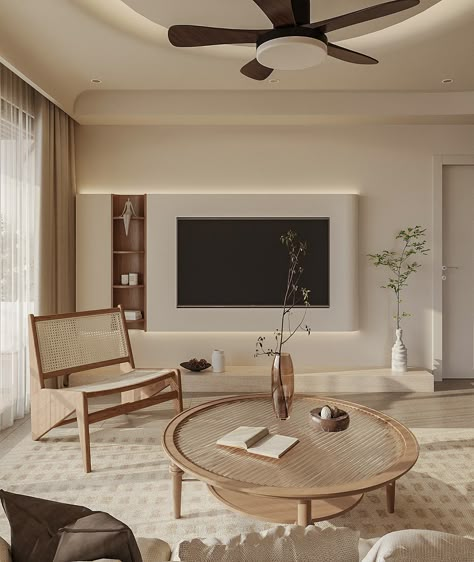

In [ ]:
import os
import io
import pickle
import sqlite3
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

# ---------- CONFIG ----------
image_size = (224, 224)
top_k = 5

# ---------- LOAD MODEL & DATA ----------
model = load_model("efficientnet_feature_extractor.h5")
features = np.load("features.npy")
with open("image_paths.pkl", "rb") as f:
    image_paths = pickle.load(f)

# ---------- CONNECT SQLITE ----------
conn = sqlite3.connect("property_full_data_clickable.db")
cursor = conn.cursor()

def get_property_info(image_path):
    cursor.execute("""
        SELECT title, price, bedrooms, bathrooms, area 
        FROM properties 
        WHERE image_path = ?
        LIMIT 1
    """, (image_path,))
    row = cursor.fetchone()
    if row:
        return {
            "title": row[0],
            "price": row[1],
            "bedrooms": row[2],
            "bathrooms": row[3],
            "area": row[4]
        }
    return None

# ---------- PREPROCESS ----------
def preprocess_image(img):
    img = img.convert("RGB").resize(image_size)
    x = np.expand_dims(np.array(img), axis=0)
    return preprocess_input(x)

# ---------- HTML CARD ----------
def get_info_html_from_db(image_path, sim_percent):
    info = get_property_info(image_path)
    if not info:
        return f"""
        <div style="border:1px solid #ccc; padding:10px; margin:10px; width:300px">
            <img src="{image_path}" width="100%">
            <p><b>ไม่พบข้อมูล</b></p>
            <p>ความคล้าย: {sim_percent}%</p>
        </div>
        """
    return f"""
    <div style="border:1px solid #ccc; padding:10px; margin:10px; width:300px; display:inline-block; vertical-align:top">
        <img src="{image_path}" width="100%">
        <h4 style="margin:5px 0">{info['title']}</h4>
        <p style="margin:3px 0">💰 <b>{info['price']}</b></p>
        <p style="margin:3px 0">🛏️ {info['bedrooms']} ห้องนอน | 🛁 {info['bathrooms']} ห้องน้ำ</p>
        <p style="margin:3px 0">📐 {info['area']}</p>
        <p style="margin:3px 0; color:green"><b>ความคล้าย: {sim_percent}%</b></p>
    </div>
    """

# ---------- SEARCH & DISPLAY ----------
def search_and_display(query_img):
    query_feature = model.predict(preprocess_image(query_img), verbose=0)[0]
    nn = NearestNeighbors(n_neighbors=top_k, metric="cosine")
    nn.fit(features)
    distances, indices = nn.kneighbors([query_feature])

    clear_output(wait=True)
    display(widgets.HTML("<h3>📷 ภาพที่คุณอัปโหลด:</h3>"))
    display(query_img)

    print("\n🔍 ภาพที่คล้ายกับภาพที่อัปโหลด:")
    html_cards = ""
    for i, idx in enumerate(indices[0]):
        img_path = image_paths[idx]
        sim_percent = round((1 - distances[0][i]) * 100, 2)
        print(f"👉 {img_path} ({sim_percent}%)")
        html_cards += get_info_html_from_db(img_path, sim_percent)

    display(HTML(html_cards))

# ---------- UPLOAD + AUTO PROCESS ----------
def on_upload_change(change):
    if uploader.value:
        file_obj = uploader.value[0] if isinstance(uploader.value, tuple) else next(iter(uploader.value.values()))
        img_data = file_obj['content']
        img = Image.open(io.BytesIO(img_data))
        search_and_display(img)

uploader = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
uploader.observe(on_upload_change, names='value')

display(widgets.HTML("<h3>📤 อัปโหลดภาพเพื่อค้นหาภาพที่คล้ายกัน</h3>"))
display(uploader)


In [ ]:
# # ---------- Query ภาพและแสดงผล ----------
# query_image = image_paths[0]
# query_feature = model.predict(load_and_preprocess(query_image), verbose=0)[0]
# distances, indices = nn_model.kneighbors([query_feature])

# # ---------- แสดงภาพและ % ความคล้าย ----------
# plt.figure(figsize=(15, 4))

# # Query
# plt.subplot(1, 6, 1)
# img = Image.open(query_image)
# plt.imshow(img)
# plt.title("Query")
# plt.axis("off")

# # Top-5 Results
# print(f"\n🔍 ภาพที่คล้ายกับ {query_image}")
# for i, idx in enumerate(indices[0]):
#     path = image_paths[idx]
#     sim = 1 - distances[0][i]
#     sim_percent = round(sim * 100, 2)

#     # แสดงภาพ
#     plt.subplot(1, 6, i + 2)
#     img = Image.open(path)
#     plt.imshow(img)
#     plt.title(f"{sim_percent}%")
#     plt.axis("off")

#     # แสดงใน console
#     print(f"👉 {path}  ({sim_percent}%)")

# plt.suptitle("Top 5 Similar Images with % Similarity", fontsize=14)
# plt.tight_layout()
# plt.show()

In [ ]:
# import ipywidgets as widgets

# # ---------- Upload Widget ----------
# uploader = widgets.FileUpload(accept='.jpg,.jpeg,.png', multiple=False)
# display(widgets.HTML("<h3>📤 อัปโหลดภาพเพื่อค้นหาภาพที่คล้ายกัน</h3>"))
# display(uploader)

# # ---------- Process Uploaded Image ----------
# if uploader.value:
#     file_info = next(iter(uploader.value.values()))
#     img_data = file_info['content']
#     img = Image.open(io.BytesIO(img_data))

#     display(widgets.HTML("<h4>📷 ภาพที่คุณอัปโหลด:</h4>"))
#     display(img)

#     # Extract feature
#     x = load_and_preprocess(img)
#     query_feature = model.predict(x, verbose=0)[0]

#     distances, indices = nn_model.kneighbors([query_feature])

#     # Show Results
#     plt.figure(figsize=(15, 4))
#     plt.subplot(1, top_k + 1, 1)
#     plt.imshow(img)
#     plt.title("Query")
#     plt.axis("off")

#     for i, idx in enumerate(indices[0]):
#         sim_score = 1 - distances[0][i]
#         sim_percent = round(sim_score * 100, 2)
#         sim_img = Image.open(image_paths[idx])
#         plt.subplot(1, top_k + 1, i + 2)
#         plt.imshow(sim_img)
#         plt.title(f"{sim_percent}%")
#         plt.axis("off")

#     plt.suptitle("🔍 ภาพที่คล้ายกัน", fontsize=14)
#     plt.tight_layout()
#     plt.show()

#     # Print results in console
#     print(f"\n🔍 ภาพที่คล้ายกับภาพที่อัปโหลด:")
#     for i, idx in enumerate(indices[0]):
#         print(f"👉 {image_paths[idx]}  ({round((1 - distances[0][i]) * 100, 2)}%)")
# else:
#     print("📌 กรุณาอัปโหลดภาพก่อนใช้งาน")
